In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10,7)

In [3]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [4]:
df = pd.concat([train, test], ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null object
Date_of_Journey    13354 non-null object
Dep_Time           13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null object
Price              10683 non-null float64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dtype: int64

In [7]:
df.head(10)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop
5,No info,SpiceJet,11:25,24/06/2019,09:00,Banglore,2h 25m,3873.0,CCU → BLR,Kolkata,non-stop
6,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,18:55,New Delhi,15h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop
7,No info,Jet Airways,05:05 02 Mar,01/03/2019,08:00,New Delhi,21h 5m,22270.0,BLR → BOM → DEL,Banglore,1 stop
8,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,08:55,New Delhi,25h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop
9,No info,Multiple carriers,19:15,27/05/2019,11:25,Cochin,7h 50m,8625.0,DEL → BOM → COK,Delhi,1 stop


Data Analysis and Feature Engineering

In [8]:
df['Total_Stops'].fillna(df['Total_Stops'].mode(), inplace=True)

In [9]:
df['Route'].nunique()

132

In [10]:
# column too large to deal with
df.drop('Route', axis=1, inplace=True)

In [11]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [12]:
df['Additional_Info'].replace(['No Info'], ['No info'], inplace=True)

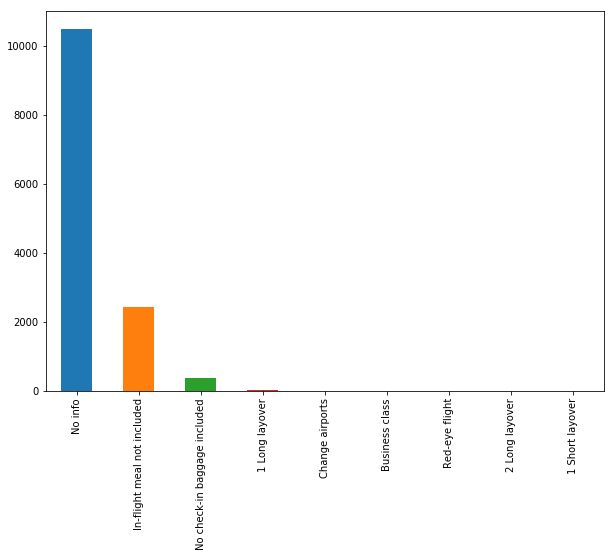

In [13]:
df['Additional_Info'].value_counts().plot.bar()

In [14]:
# column not of much use
df.drop('Additional_Info', axis=1, inplace=True)

In [15]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [16]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [17]:
# new delhi and delhi are two columns, I think both should be the same because there is just one airport

In [18]:
df['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [19]:
# I think source:destination pairs could influence price tickets
# let's check this

In [20]:
df['Source_and_Dest'] = df['Source'] + df['Destination']

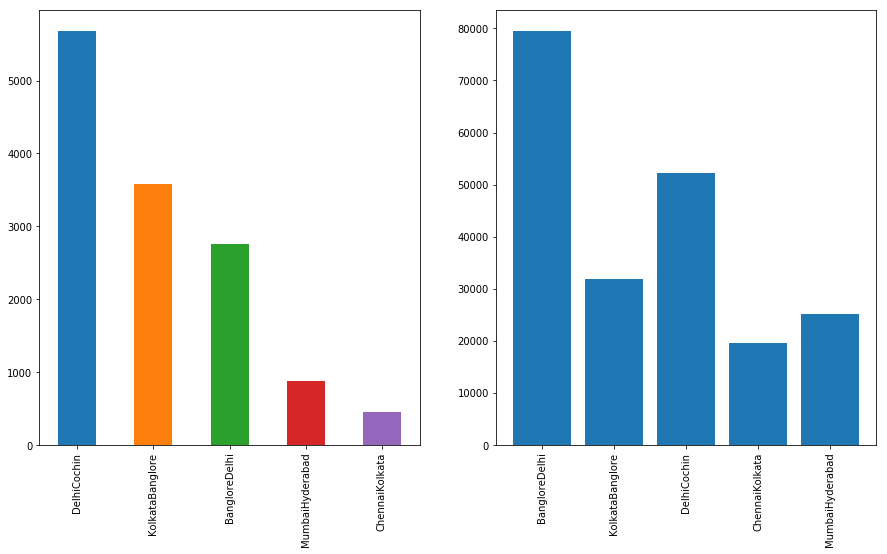

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
df['Source_and_Dest'].value_counts().plot.bar(ax=ax[0])
plt.xticks(rotation='vertical')
plt.bar(df['Source_and_Dest'], df['Price'])
plt.show()

In [22]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [23]:
df['Arrival_Time'] = [x.split()[0] for x in df['Arrival_Time']]

In [24]:
df.head()

,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Source,Total_Stops,Source_and_Dest
0,IndiGo,01:10,2019-03-24,22:20,Delhi,2h 50m,3897.0,Banglore,non-stop,BangloreDelhi
1,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,Kolkata,2 stops,KolkataBanglore
2,Jet Airways,04:25,2019-09-06,09:25,Cochin,19h,13882.0,Delhi,2 stops,DelhiCochin
3,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,Kolkata,1 stop,KolkataBanglore
4,IndiGo,21:35,2019-01-03,16:50,Delhi,4h 45m,13302.0,Banglore,1 stop,BangloreDelhi


In [25]:
df['Month'] = [x.month for x in  df['Date_of_Journey']]

In [28]:
df['Month'] = df['Month'].astype(str)

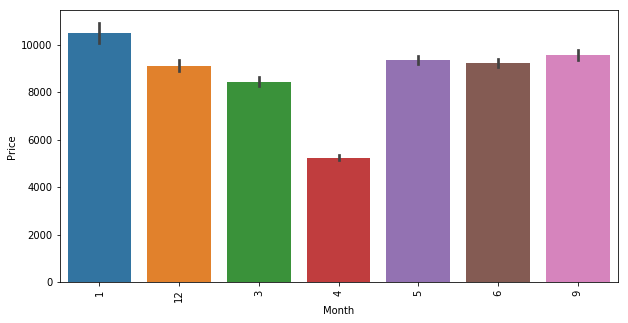

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(df['Month'], df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [33]:
# something happened in April, hence such a drastic decrease in prices
# we'll create a column to recognise this
df['April'] = df['Month'].apply(lambda x: 0 if x == 4 else 1)

In [34]:
# let's process duration
hours = [x[0].strip('h') for x in df['Duration']]
mins = []
for a in range(len(df)):
    if len(df['Duration'][a].split()) > 1:
        mins.append(df['Duration'][a].split()[1].strip('m'))
    else:
        mins.append('0')

In [35]:
time = [x + ':' + y for x,y in zip(hours, mins)]

In [36]:
hr_dur = []
for x in time:
    if int(x.split(':')[1]) < 30:
        hr_dur.append(int(x.split(':')[0]))
    elif int(x.split(':')[1]) == 30:
        hr_dur.append(int(x.split(':')[0]) + 0.5)
    else:
        hr_dur.append(int(x.split(':')[0]) + 1)

In [37]:
# duration in hour
df['Duration'] = hr_dur

In [38]:
df.drop(['Arrival_Time', 'Dep_Time'], axis=1, inplace=True)

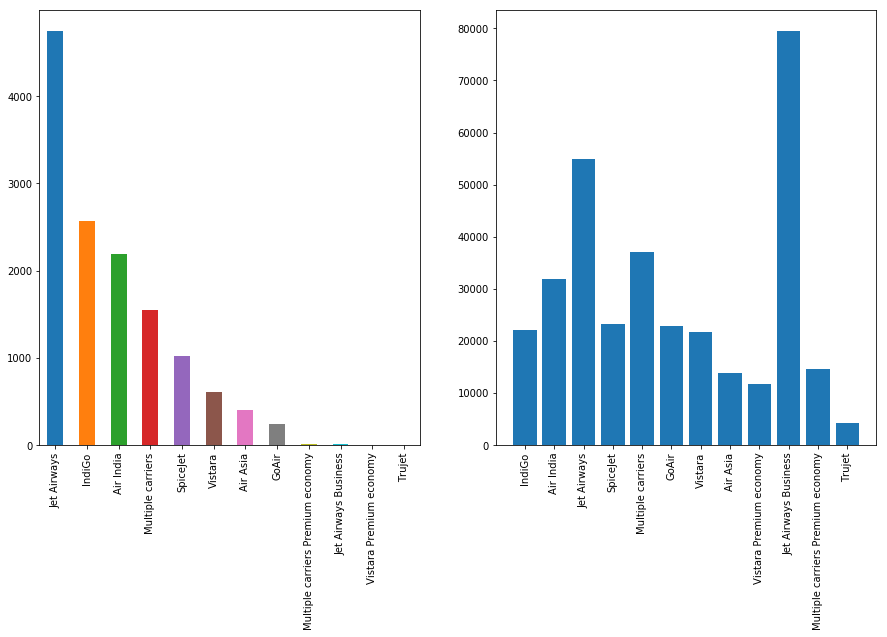

In [39]:
# finally, let's check out how airlines relate to prices
fig, ax = plt.subplots(1,2, figsize=(15,8))
df['Airline'].value_counts().plot.bar(ax=ax[0])
plt.xticks(rotation='vertical')
plt.bar(df['Airline'], df['Price'])
plt.show()

In [40]:
df.head()

,Airline,Date_of_Journey,Destination,Duration,Price,Source,Total_Stops,Source_and_Dest,Month,April
0,IndiGo,2019-03-24,Delhi,3.0,3897.0,Banglore,non-stop,BangloreDelhi,3,1
1,Air India,2019-01-05,Banglore,7.0,7662.0,Kolkata,2 stops,KolkataBanglore,1,1
2,Jet Airways,2019-09-06,Cochin,1.0,13882.0,Delhi,2 stops,DelhiCochin,9,1
3,IndiGo,2019-12-05,Banglore,5.0,6218.0,Kolkata,1 stop,KolkataBanglore,12,1
4,IndiGo,2019-01-03,Delhi,5.0,13302.0,Banglore,1 stop,BangloreDelhi,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 10 columns):
Airline            13354 non-null object
Date_of_Journey    13354 non-null datetime64[ns]
Destination        13354 non-null object
Duration           13354 non-null float64
Price              10683 non-null float64
Source             13354 non-null object
Total_Stops        13353 non-null object
Source_and_Dest    13354 non-null object
Month              13354 non-null object
April              13354 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.0+ MB


In [42]:
df = pd.get_dummies(df)

In [46]:
# creating training, validation and testing set
train = df.iloc[:8547]
valid = df.iloc[8547:10683]
test = df.iloc[10683:]

In [47]:
X = train.drop(['Price', 'Date_of_Journey'], axis=1)
y = train['Price']

In [50]:
Xv = valid.drop(['Price', 'Date_of_Journey'], axis=1)
yv = valid['Price']

In [49]:
X_ = test.drop(['Price', 'Date_of_Journey'], axis=1)
y_ = test['Price']

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [52]:
rf = RandomForestRegressor(n_jobs=-1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
pred = np.round(rf.predict(X_test), 2)
np.sqrt(mean_squared_error(y_test, pred))

2592.045421193578

In [88]:
error = []
for i in range(1,40):
    rf = RandomForestRegressor(n_jobs=-1, n_estimators=i)
    rf.fit(X_train, y_train)
    pred = np.round(rf.predict(X_test), 2)
    error.append(np.sqrt(mean_squared_error(y_test, pred)))

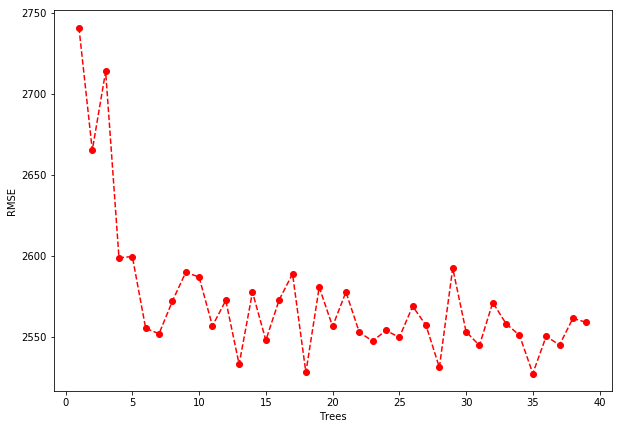

In [89]:
plt.plot(range(1,40), error, 'r--', marker='o')
plt.xlabel('Trees')
plt.ylabel('RMSE')
plt.show()

In [90]:
error = []
for i in range(1,40):
    rf = RandomForestRegressor(n_jobs=-1, n_estimators=i)
    rf.fit(X_train, y_train)
    error.append(rf.score(X_test, y_test))

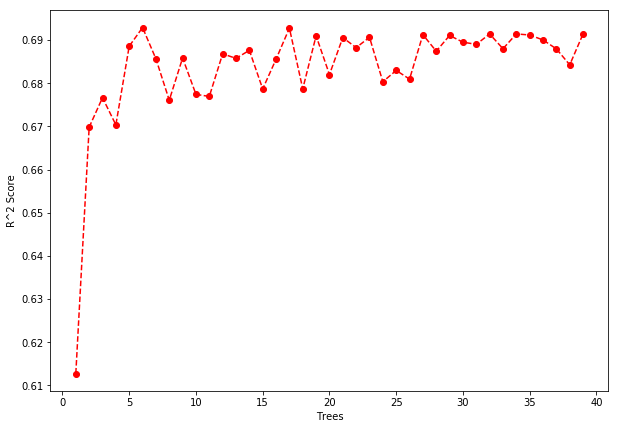

In [91]:
plt.plot(range(1,40), error, 'r--', marker='o')
plt.xlabel('Trees')
plt.ylabel('R^2 Score')
plt.show()

In [120]:
# 7 seems to be a decent fit
rf = RandomForestRegressor(n_jobs=-1, n_estimators=7)

In [121]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [154]:
pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))
print(rf.score(X_test, y_test))

2551.9346789527217
0.6894204727288513


In [155]:
pred = rf.predict(Xv)
print(np.sqrt(mean_squared_error(yv, pred)))
print(rf.score(Xv, yv))

2560.158996774183
0.6906706663787469


In [156]:
# rmse and r^2 scores for validation and training set are similar, so we finalise this model
final = rf.predict(X_)
result = pd.DataFrame(final, columns=['Price'])
result.to_csv('result.csv', index=False)